In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
sns.set()
pd.options.display.max_columns = 100
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['Simhei']

In [25]:
df = pd.read_csv('result_new.csv')
###加这行就是年度的，不加就是季度的
df = df[df['月份']==12]
#df = df[(df['Z']>=-9) & (df['Z']<=9)]

### 描述性统计 

In [13]:
def my_describe(df_):
    features = []
    for k in range(2010,2019):
        tmp = df_[df_['年份'] == k]['Z']
        features.append(k)
        features.append(tmp.count())
        features.append(tmp.mean())
        features.append(tmp.median())
        features.append(tmp.var())
        features.append(tmp.max())
        features.append(tmp.min())
        features.append(tmp.skew())
        features.append(tmp.kurt())
    col = ['年份', '样本量', '均值', '中位数', '方差', '最大值', '最小值', '偏度', '峰度']
    temp = pd.DataFrame(np.array(features).reshape(9, -1), columns = col)
    temp['年份'] = temp['年份'].astype(int)
    temp['样本量'] = temp['样本量'].astype(int)
    temp = temp.set_index('年份')
    return temp

In [14]:
df_ = df[(df['类型'] == '中央国有企业')|(df['类型'] == '地方国有企业')|(df['类型'] == '民营企业')]
temp = my_describe(df_)
temp

,样本量,均值,中位数,方差,最大值,最小值,偏度,峰度
年份,,,,,,,,
2010,639,4.394352,2.826614,28.180198,44.177028,-0.641161,3.706744,17.249401
2011,643,3.292879,2.260447,15.034940,40.324965,-2.349891,4.557305,29.501684
2012,643,3.045795,2.111634,12.908842,47.166647,-4.156543,5.136486,43.821572
2013,648,3.056069,2.127398,11.687668,40.872707,-1.521423,4.647068,35.043856
2014,633,4.059006,2.404080,193.782403,338.812987,-5.708400,22.198500,531.578043
2015,630,4.565269,2.532132,60.729166,139.591181,-9.913659,9.860920,150.133456
2016,637,4.238864,2.327939,94.005309,197.957954,-0.894855,14.195744,261.397367
2017,633,3.627866,2.209081,35.401740,96.552702,-1.286177,8.910762,113.849184
2018,659,4.424083,1.948228,989.707622,777.406182,-0.889498,23.025341,558.548976


In [16]:
df_ = df[(df['类型'] == '中央国有企业')]
temp = my_describe(df_)
temp

,样本量,均值,中位数,方差,最大值,最小值,偏度,峰度
年份,,,,,,,,
2010,232,5.082467,2.908070,47.966581,44.177028,-0.641161,3.291563,11.784930
2011,234,3.578864,2.438343,21.606335,36.204591,-2.349891,3.998779,19.431088
2012,232,3.176992,2.231615,13.575961,28.616684,-2.136028,3.451463,15.438083
2013,235,3.330261,2.222723,18.802777,40.872707,-1.521423,4.915941,33.093706
2014,237,5.214410,2.609686,487.461915,338.812987,-1.031256,14.746489,223.507670
2015,229,5.230224,2.800387,113.946327,139.591181,-0.751789,9.451422,112.444605
2016,232,4.104996,2.361854,35.812906,63.972118,-0.600001,5.707184,47.632332
2017,226,3.724770,2.237439,50.390861,96.552702,-1.286177,10.298917,131.093601
2018,240,2.760563,1.952255,10.541414,28.557574,-0.583130,4.351588,26.435990


In [22]:
df_ = df[(df['类型'] == '地方国有企业')]
temp = my_describe(df_)
temp

,样本量,均值,中位数,方差,最大值,最小值,偏度,峰度
年份,,,,,,,,
2010,357,3.868157,2.652735,16.389804,35.086578,-0.223594,3.454273,16.536515
2011,357,3.068383,2.133160,11.230206,40.324965,-1.042429,5.312828,46.483632
2012,360,2.954553,2.039286,12.919622,47.166647,-0.420355,6.583347,67.513427
2013,362,2.829297,2.068063,6.699836,16.879730,-0.361278,2.669628,9.303619
2014,346,3.134399,2.262242,8.144788,17.389314,-5.708400,1.942374,5.266022
2015,352,3.953363,2.365058,23.019901,39.318115,-9.913659,3.171066,15.043365
2016,353,3.588371,2.160107,18.477045,33.058300,-0.894855,3.533746,16.511802
2017,356,3.237985,2.126284,14.004579,31.714456,-1.079383,3.929050,21.523732
2018,367,5.406075,1.891685,1754.526332,777.406182,-0.889498,17.498370,318.889387


In [19]:
df_ = df[(df['类型'] == '民营企业')]
temp = my_describe(df_)
temp

,样本量,均值,中位数,方差,最大值,最小值,偏度,峰度
年份,,,,,,,,
2010,50,4.958527,3.694413,17.128612,18.351693,0.651122,1.798956,3.039497
2011,52,3.547198,2.424759,11.366830,16.916253,-0.579255,2.346750,6.419770
2012,51,3.093039,2.315897,10.123626,17.550617,-4.156543,2.423828,9.666397
2013,51,3.402278,2.213768,14.020676,21.293554,-0.528931,2.953545,10.811597
2014,50,4.980680,2.790830,80.915536,58.751945,-0.587366,4.939548,27.423565
2015,49,5.853358,3.263818,79.677990,59.031537,-0.366423,4.695597,26.823951
2016,52,9.251962,3.004224,853.928020,197.957954,0.393136,5.867005,36.289572
2017,51,5.919967,3.020169,114.803065,58.288614,-0.384726,4.242268,18.542106
2018,52,5.171272,2.287776,107.931305,65.667134,0.312746,4.797166,25.047510


### 盒状图 

In [3]:
df = df[(df['Z']>=-9) & (df['Z']<=9)]

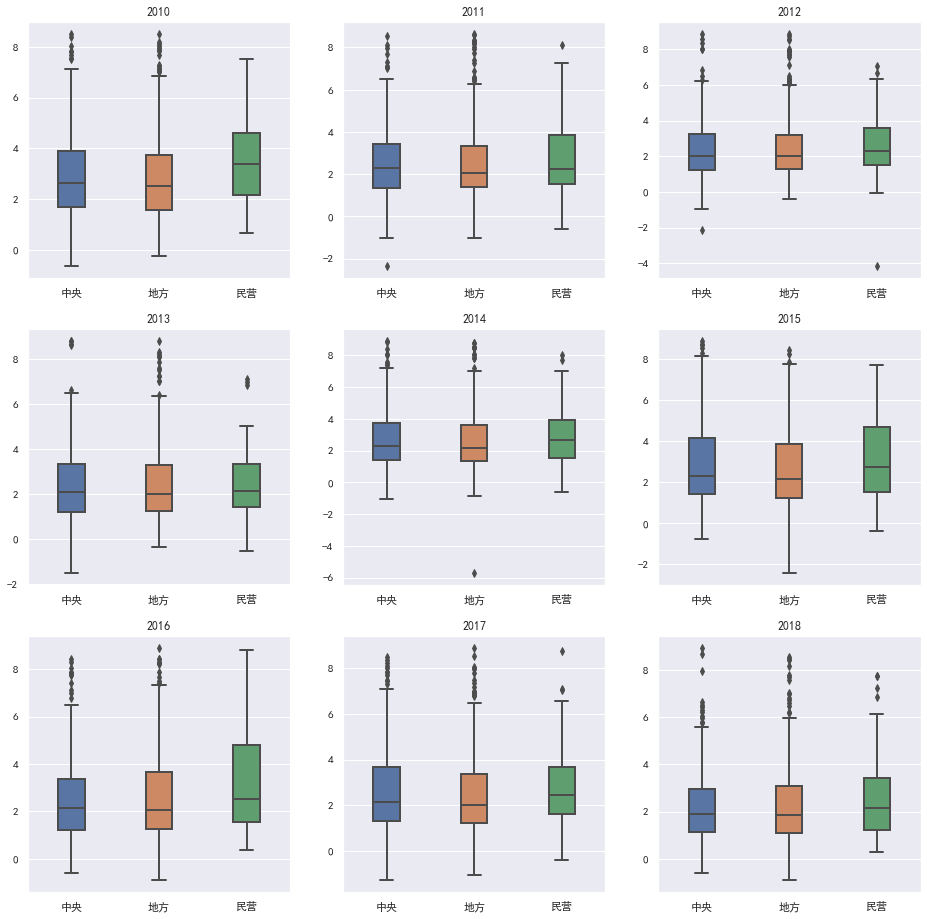

In [4]:
plt.figure(figsize=(16, 16))
for i in range(1,10):
    plt.subplot(3,3,i)
    df_ = df[df['年份'] == i+2009]
    a = df_[df_['类型'] == '中央国有企业']['Z'].reset_index(drop=True)
    b = df_[df_['类型'] == '地方国有企业']['Z'].reset_index(drop=True)
    c = df_[df_['类型'] == '民营企业']['Z'].reset_index(drop=True)
    k = pd.concat([a,b,c], axis=1)
    k.columns = ['中央', '地方', '民营']
    sns.boxplot(data=k, linewidth=2, width=0.3)
    plt.title(str(i+2009))
plt.show()

### 折线图 

In [9]:
df = pd.read_csv('result_new.csv')
df = df[df['年份']>=2010]
df = df[(df['Z']>=-9) & (df['Z']<=9)]
aa = df[df['类型'] == '中央国有企业'].reset_index(drop=True)
bb = df[df['类型'] == '地方国有企业'].reset_index(drop=True)
cc = df[df['类型'] == '民营企业'].reset_index(drop=True)
kk = pd.concat([aa.groupby(['日期'])['Z'].mean(),bb.groupby(['日期'])['Z'].mean(),cc.groupby(['日期'])['Z'].mean()],axis = 1)
kk.columns = ['中央', '地方', '民营']
kk = kk.reset_index()
kk = kk.sort_values('日期', ascending=True)
kk = kk.drop('日期',axis = 1)
kk = kk.reset_index(drop=True)

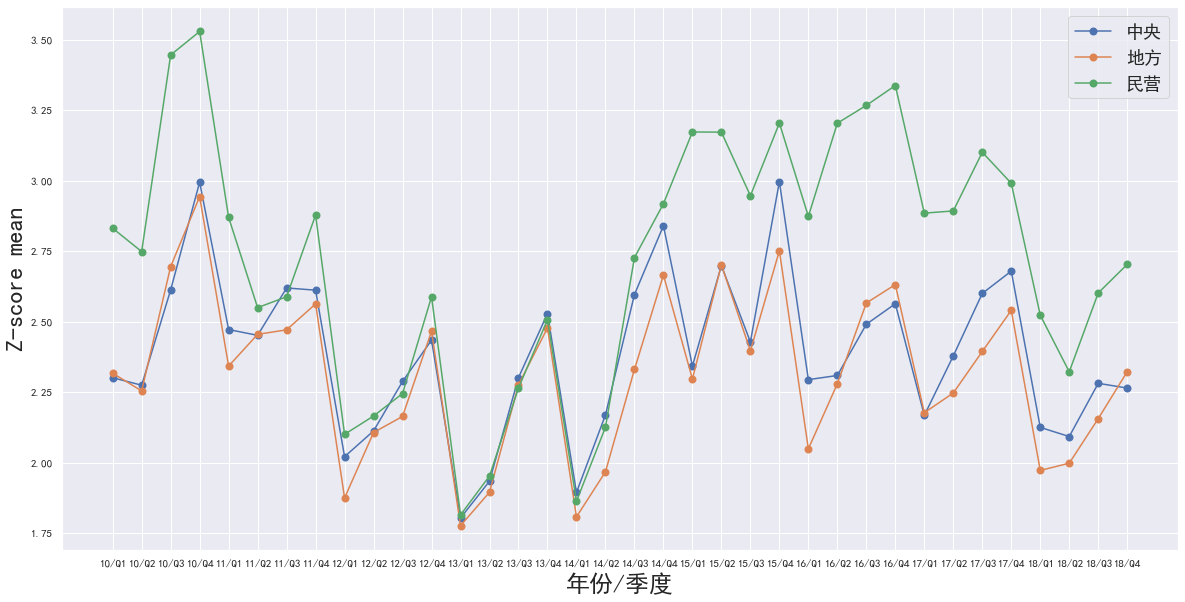

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(kk, marker='.', markeredgewidth=5)
x = ['10/Q1','10/Q2','10/Q3','10/Q4','11/Q1','11/Q2','11/Q3','11/Q4','12/Q1', '12/Q2', '12/Q3', '12/Q4', 
     '13/Q1','13/Q2','13/Q3','13/Q4','14/Q1','14/Q2','14/Q3','14/Q4','15/Q1', '15/Q2', '15/Q3', '15/Q4',
     '16/Q1','16/Q2','16/Q3','16/Q4','17/Q1','17/Q2','17/Q3','17/Q4','18/Q1', '18/Q2', '18/Q3', '18/Q4']
plt.xticks(range(36), x)
plt.xlabel('年份/季度', fontsize=24)
plt.ylabel("Z-score mean", fontsize=24)
plt.legend(kk.columns, fontsize=18)
plt.show()

In [7]:
df = pd.read_csv('result_new.csv')
df = df[df['年份']>=2010]
df = df[df['月份']==12]
df = df[(df['Z']>=-9) & (df['Z']<=9)]
aa = df[df['类型'] == '中央国有企业'].reset_index(drop=True)
bb = df[df['类型'] == '地方国有企业'].reset_index(drop=True)
cc = df[df['类型'] == '民营企业'].reset_index(drop=True)
kk = pd.concat([aa.groupby(['日期'])['Z'].mean(),bb.groupby(['日期'])['Z'].mean(),cc.groupby(['日期'])['Z'].mean()],axis = 1)
kk.columns = ['中央', '地方', '民营']
kk = kk.reset_index()
kk = kk.sort_values('日期', ascending=True)
kk = kk.drop('日期',axis = 1)
kk = kk.reset_index(drop=True)

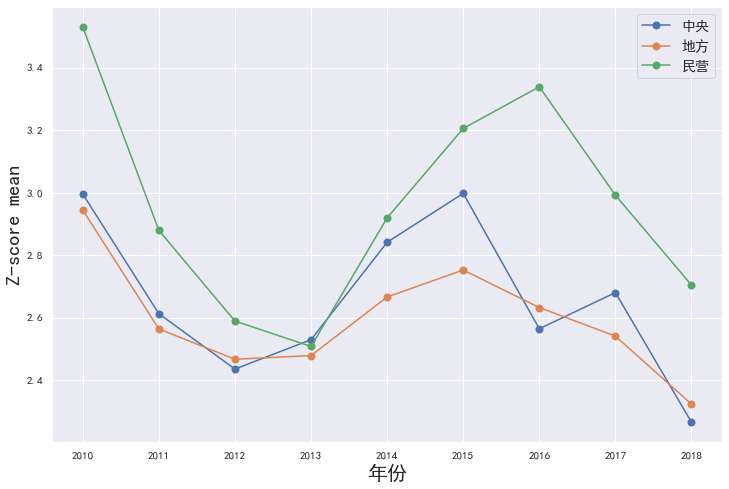

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(kk, marker='.', markeredgewidth=5)
x = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
plt.xticks(range(9), x)
plt.xlabel('年份', fontsize=20)
plt.ylabel("Z-score mean", fontsize=20)
plt.legend(kk.columns, fontsize=14)
plt.show()